In [16]:
POP_SIZE = 1000
TOURNAMENT_SIZE = 4
NUM_GENERATIONS = 1000
CROSSOVER_RATE = 0.9
MUTATION_RATE = 0.03
ELITISM_PERCENTAGE = 0.2

from Utils import read_instance, check_solution, initialize_population, generate_next_generation
from matplotlib import pyplot as plt

NUM_EXAMS, NUM_TIMESLOTS, NUM_STUDENTS, student_matrix = read_instance("medium_instance.txt")

print("N - Number of Exams:", NUM_EXAMS)
print("K - Number of Timeslots:", NUM_TIMESLOTS)
print("M - Number of Students:", NUM_STUDENTS)

N - Number of Exams: 25
K - Number of Timeslots: 10
M - Number of Students: 60


# **Assignment 1 - Timetabling Problem - Joey Galvin 22348861**

In [17]:
# print("\nMatrix:")
# for i, row in enumerate(student_matrix):
#     print(f"Student{i:2d}: {row}")

initial_population = initialize_population(POP_SIZE, NUM_EXAMS, NUM_TIMESLOTS)
print("\nInitial Population:")
for i, solution in enumerate(initial_population):
    print(f"Solution {i}: {solution}")

fitnesses = [check_solution(solution, student_matrix) for solution in initial_population]

print("\nFitnesses:")
for i, fitness in enumerate(fitnesses):
    print(f"Solution {i}: Fitness = {fitness}")

print("Average Fitness:", sum(fitnesses)/len(fitnesses))



Initial Population:
Solution 0: [9, 9, 1, 5, 9, 4, 1, 9, 7, 4, 0, 9, 3, 6, 5, 2, 1, 1, 7, 7, 2, 6, 2, 1, 9]
Solution 1: [9, 7, 1, 1, 2, 8, 9, 0, 8, 0, 8, 1, 5, 3, 0, 5, 1, 1, 4, 5, 4, 8, 8, 5, 4]
Solution 2: [0, 6, 3, 2, 5, 2, 9, 0, 3, 2, 3, 6, 4, 1, 2, 1, 2, 0, 7, 8, 9, 6, 5, 5, 6]
Solution 3: [5, 8, 4, 8, 3, 3, 4, 1, 4, 0, 3, 1, 8, 8, 1, 8, 6, 6, 7, 8, 9, 3, 2, 8, 9]
Solution 4: [1, 3, 2, 9, 3, 5, 3, 3, 0, 8, 1, 1, 5, 6, 3, 2, 6, 2, 3, 7, 7, 0, 8, 1, 0]
Solution 5: [2, 5, 5, 2, 9, 2, 9, 2, 8, 9, 2, 4, 9, 6, 9, 6, 7, 7, 0, 6, 3, 5, 7, 3, 1]
Solution 6: [3, 8, 6, 4, 8, 0, 6, 5, 0, 6, 8, 5, 0, 3, 7, 7, 6, 4, 7, 9, 5, 4, 2, 8, 9]
Solution 7: [9, 7, 5, 6, 9, 2, 9, 6, 3, 6, 9, 2, 5, 5, 6, 5, 1, 4, 3, 9, 4, 1, 8, 7, 5]
Solution 8: [3, 1, 7, 7, 2, 9, 0, 1, 9, 0, 6, 3, 1, 4, 8, 6, 7, 6, 3, 8, 7, 1, 2, 9, 2]
Solution 9: [7, 9, 9, 5, 7, 3, 8, 0, 8, 1, 9, 9, 5, 7, 5, 8, 1, 7, 0, 1, 4, 7, 5, 3, 8]
Solution 10: [0, 7, 3, 4, 5, 7, 1, 5, 3, 7, 3, 4, 8, 5, 5, 7, 4, 6, 8, 1, 7, 1, 2, 6, 1]
Solution 1

Now That I have got an initial population and their fitnesses, I will being to begin to implement the genetic algorithm. I will be using tournament selection, elitism, one-point crossover, and mutation to evolve the population over multiple generations.

In [18]:
next_gen_population = generate_next_generation(initial_population, student_matrix, POP_SIZE, TOURNAMENT_SIZE, CROSSOVER_RATE, MUTATION_RATE, NUM_TIMESLOTS, ELITISM_PERCENTAGE)
fitnesses = [check_solution(solution, student_matrix) for solution in next_gen_population]
print("Average Fitness:", sum(fitnesses)/len(fitnesses))

Average Fitness: 22.05


Next generation generated and average fitness collected, now need to automate this process over multiple generations and plot the increase in fitness over generations.

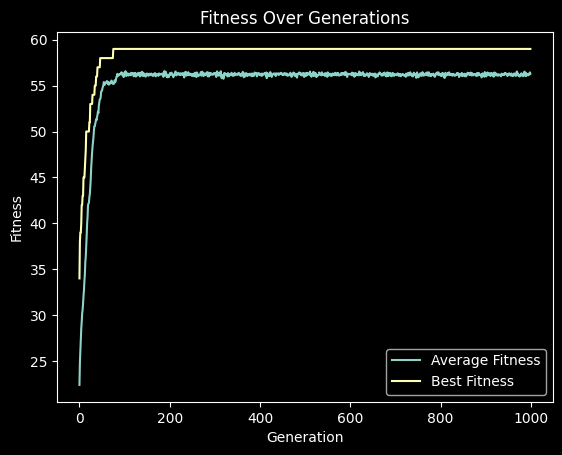

In [19]:
i = 0
avg_fitnesses = []
best_fitnesses = []
while i < NUM_GENERATIONS:
    next_gen_population = generate_next_generation(initial_population, student_matrix, POP_SIZE, TOURNAMENT_SIZE, CROSSOVER_RATE, MUTATION_RATE, NUM_TIMESLOTS, ELITISM_PERCENTAGE)
    fitnesses = [check_solution(solution, student_matrix) for solution in next_gen_population]
    avg_fitnesses.append(sum(fitnesses)/len(fitnesses))
    best_fitnesses.append(max(fitnesses))
    initial_population = next_gen_population
    i += 1

plt.plot(avg_fitnesses, label="Average Fitness")
plt.plot(best_fitnesses, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations")
plt.legend()

In [20]:
best_idx = fitnesses.index(max(fitnesses))
print(f"Best Solution: {next_gen_population[best_idx]}")
print(f"Best Fitness: {max(fitnesses)}/{NUM_STUDENTS}")

Best Solution: [9, 4, 1, 2, 3, 2, 1, 6, 9, 5, 4, 8, 3, 7, 0, 6, 8, 5, 6, 5, 5, 0, 4, 1, 7]
Best Fitness: 59/60
